In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.color import rgb2lab



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Try to mask white pixels



In [4]:

def mask_white_pixels(image, exclusion_threshold):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to segment white pixels
    _, mask = cv2.threshold(gray, exclusion_threshold, 255, cv2.THRESH_BINARY_INV)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, image, mask=mask)

    return result


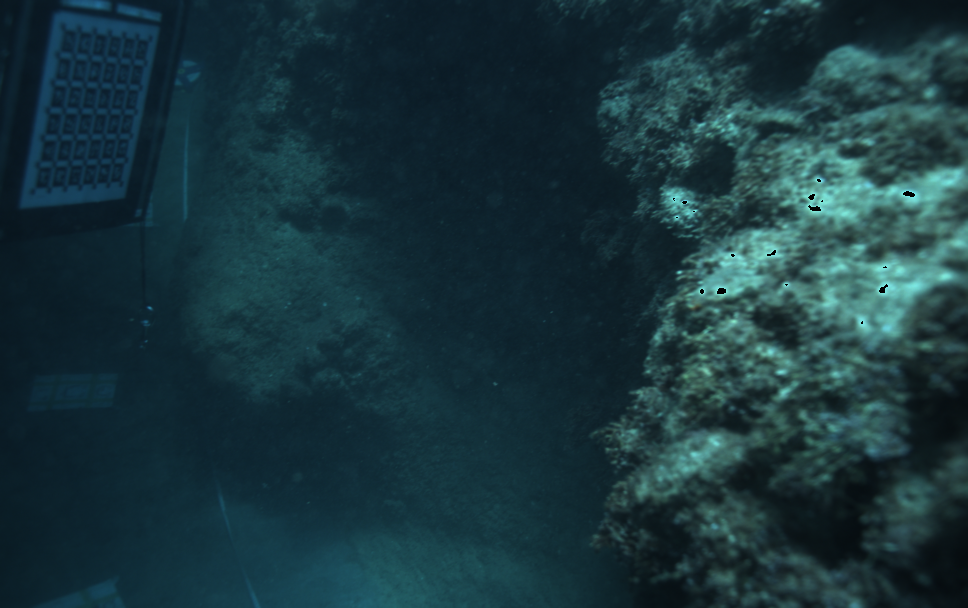

In [5]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165812779584 (1).tiff')

# Define exclusion threshold (adjust as needed)
exclusion_threshold = 200  # Example threshold, adjust as needed

# Apply the mask
masked_image = mask_white_pixels(image, exclusion_threshold)

# Display the original and masked images
#cv2_imshow(image)
cv2_imshow(masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


It doesn't mask the right thing even with a low threshold

## ARUCO markers

In [ ]:

def detect_aruco_markers(image_path, aruco_dict=cv2.aruco.DICT_6X6_250):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_50)
    parameters =  cv2.aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(dictionary, parameters)

    # Detect ArUco markers
    markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(gray)

    # Draw detected markers on the image
    if markerIds is not None:
        cv2.aruco.drawDetectedMarkers(image, markerCorners, markerIds)

    return image

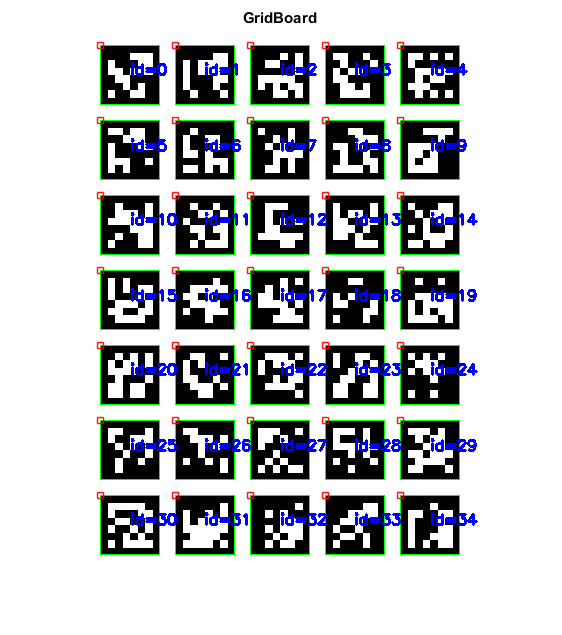

In [ ]:
# Test on aruco marker
result_image = detect_aruco_markers('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/aruco_create_board_demo_01.png')

# Display the original and masked images
#cv2_imshow(image)
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

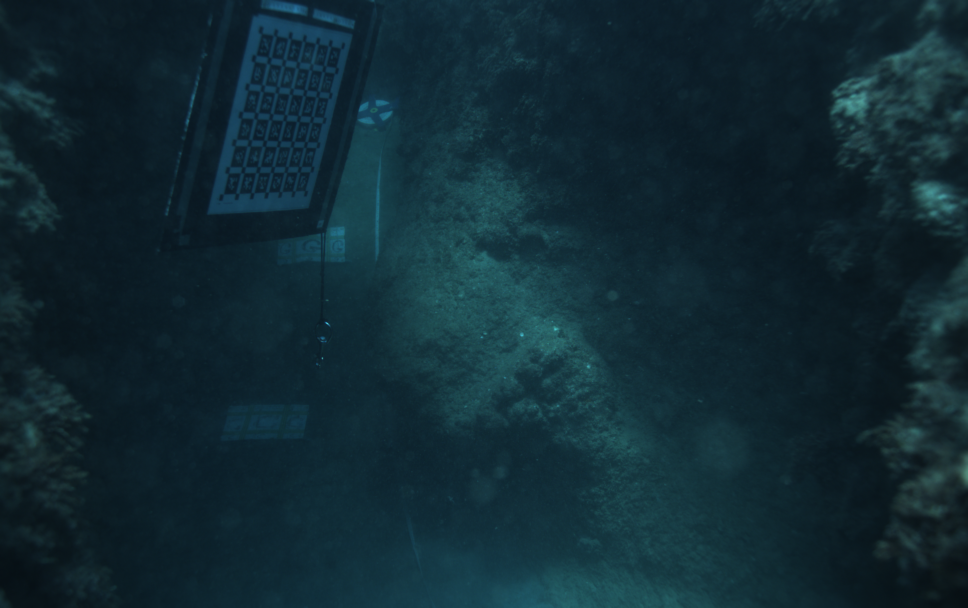

In [ ]:
# Test on aruco marker
result_image = detect_aruco_markers('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165819704340.tiff')

# Display the original and masked images
#cv2_imshow(image)
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

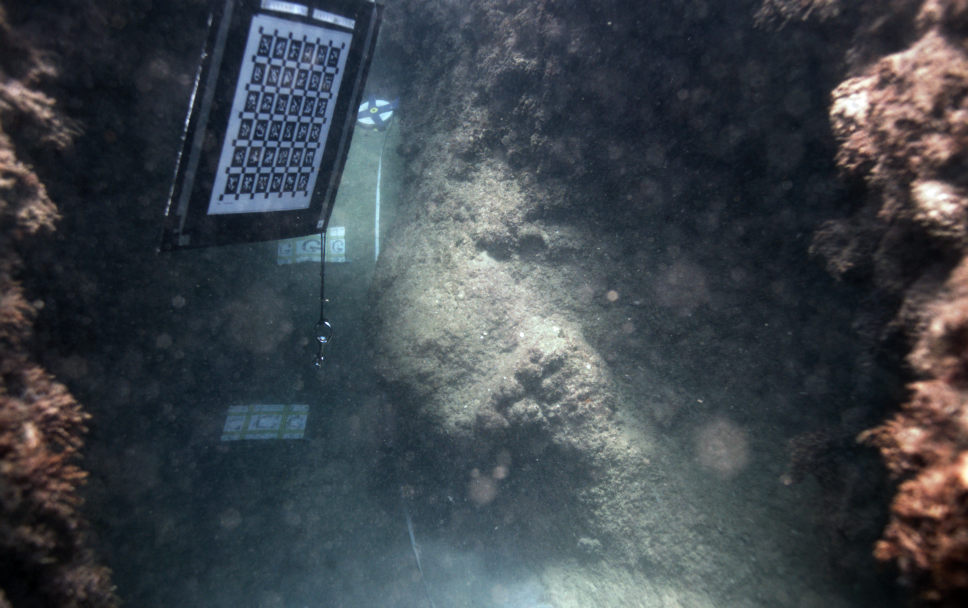

In [ ]:

result_image = detect_aruco_markers('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165819704340_SeaErra.tiff')

# Display the original and masked images
#cv2_imshow(image)
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Aruco markers don't work neither on enhanced and non enhanced images.**



## Find contours

In [ ]:

def detect_color_gradient_contours(image_path, gradient_threshold=50, kernel_size=3):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    # Calculate the gradient magnitude using Sobel edge detection
    gradient_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)
    gradient_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)
    gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)

    # Normalize gradient magnitude to the range [0, 255]
    gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    # Apply thresholding to identify regions with significant color gradient
    _, gradient_thresholded = cv2.threshold(gradient_magnitude_normalized, gradient_threshold, 255, cv2.THRESH_BINARY)

    # Find contours in the thresholded image
    contours, _ = cv2.findContours(gradient_thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    contour_image = image.copy()
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

    return contour_image


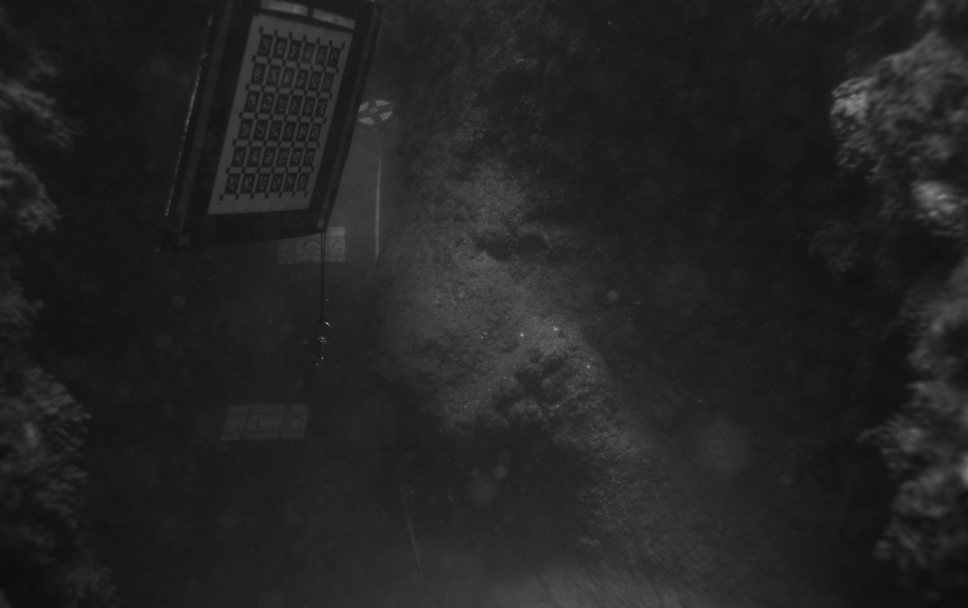

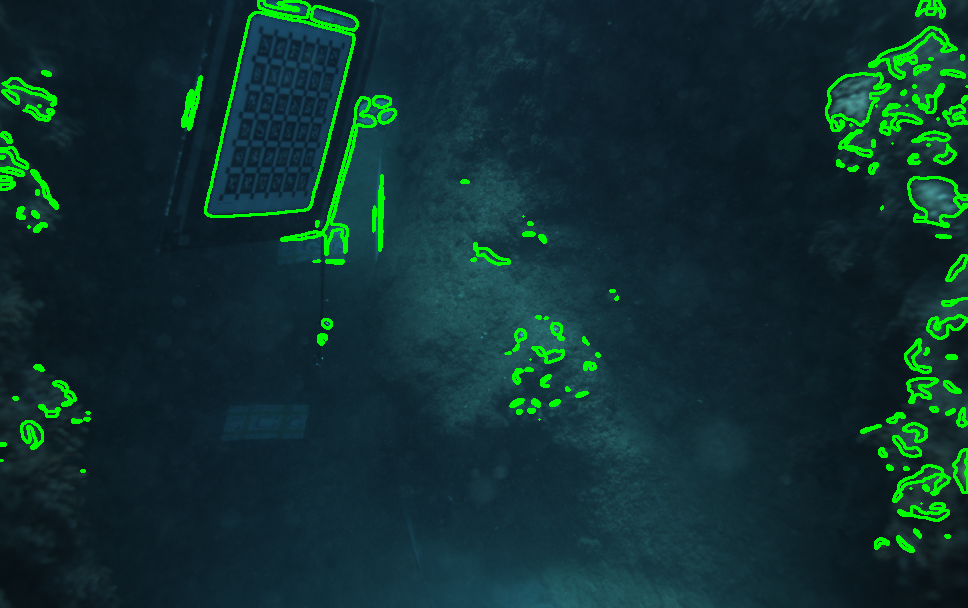

In [ ]:
image_path = '/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165819704340.tiff'
result_image = detect_color_gradient_contours(image_path, 70, 31)
# Display the result
cv2_imshow(result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


**Detects too many things, the color gradient is not a good criteria.**

## Vertices detection

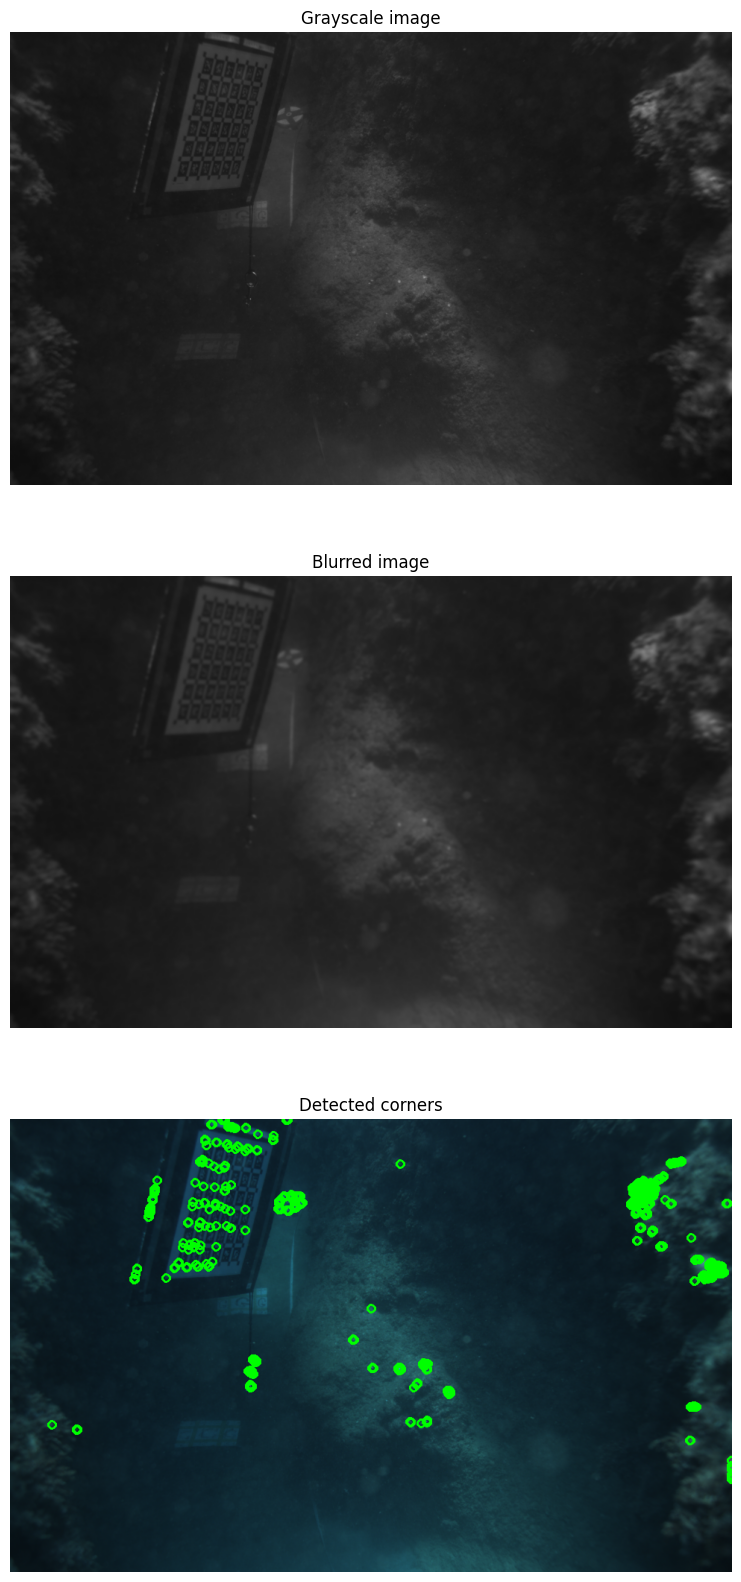

Detected corner coordinates: [(284, 0), (285, 0), (286, 0), (287, 0), (288, 0), (370, 0), (371, 0), (372, 0), (284, 1), (285, 1), (286, 1), (287, 1), (288, 1), (370, 1), (371, 1), (372, 1), (269, 7), (270, 7), (271, 7), (292, 10), (293, 10), (294, 10), (298, 10), (297, 11), (298, 11), (299, 11), (300, 11), (316, 11), (301, 12), (302, 12), (316, 12), (332, 20), (353, 22), (261, 27), (352, 27), (261, 28), (262, 28), (352, 28), (353, 28), (261, 29), (276, 31), (277, 31), (291, 33), (290, 34), (291, 34), (263, 35), (305, 36), (305, 37), (306, 37), (293, 38), (318, 39), (319, 39), (302, 40), (318, 40), (319, 40), (331, 41), (331, 42), (315, 43), (258, 54), (258, 55), (900, 56), (254, 57), (255, 57), (257, 57), (898, 57), (899, 57), (900, 57), (258, 58), (890, 58), (891, 58), (892, 58), (893, 58), (894, 58), (895, 58), (266, 59), (885, 59), (886, 59), (887, 59), (888, 59), (889, 59), (890, 59), (891, 59), (523, 60), (886, 60), (288, 62), (273, 63), (287, 65), (280, 67), (876, 76), (876, 77),

In [ ]:
def detect_and_visualize_corners(image_path):
    # Load the image
    image = cv2.imread(image_path)
    original_image = image.copy()  # Create a copy for visualization

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blurr the image
    blurred_gray = cv2.GaussianBlur(gray, (7, 7), 0)  # Adjust the kernel size as needed

    # Detect corners using the Harris Corner Detector
    corners = cv2.cornerHarris(blurred_gray, 2, 3, 0.04)

    # Threshold the corner response to identify corner points
    corner_threshold = 0.01 * corners.max()
    corner_mask = corners > corner_threshold

    # Get coordinates of detected corners
    corner_coordinates = []
    for i in range(corner_mask.shape[0]):
        for j in range(corner_mask.shape[1]):
            if corner_mask[i, j]:
                corner_coordinates.append((j, i))  # Note: OpenCV uses (x, y) convention

    # Draw circles at the detected corner coordinates on the original image
    for corner in corner_coordinates:
        cv2.circle(original_image, corner, 5, (0, 255, 0), 2)  # Green circle with radius 5

    # # Display the image with detected corners
    # cv2_imshow(original_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Create subplots with 3 rows
    fig, axes = plt.subplots(3, 1, figsize=(20, 20))  # 3 rows, 1 column

    axes[0].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Grayscale image')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(blurred_gray, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Blurred image')
    axes[1].axis('off')
    axes[2].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[2].set_title('Detected corners')
    axes[2].axis('off')

    plt.show()

    return corner_coordinates


corner_coordinates = detect_and_visualize_corners('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165819704340.tiff')
print("Detected corner coordinates:", corner_coordinates)


## Texture analysis


Here we try to understand properties of different parts of the images. how are the colors distributed? How is the texture distributed? Can we discern rocks and objects?

And we consider using the enhanced images to analyze better.

In [4]:
# load original image
original_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165819704340.tiff')

# load enhanced image
enhanced_image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DataDriven/Images/16233165819704340_SeaErra.tiff')

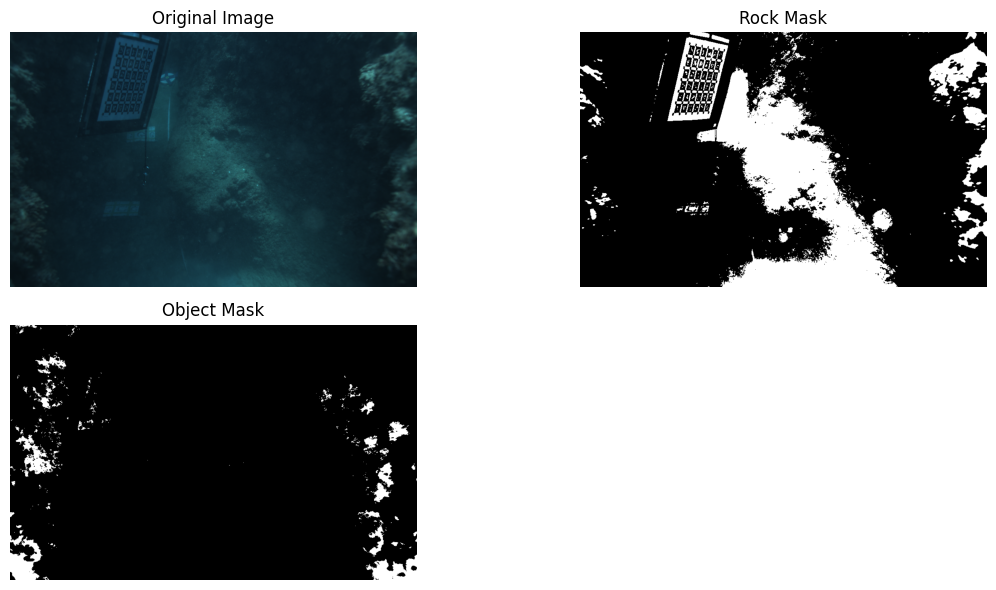

In [ ]:
# Convert the image to LAB color space
lab_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2LAB)

# Extract the L channel (lightness component) for texture analysis
L_channel = lab_image[:,:,0]

# Perform color-based segmentation
rock_mask = np.logical_and(L_channel > 50, L_channel < 150)
object_mask = np.logical_or(L_channel < 20, L_channel > 170)

# Visualize the segmentation and texture analysis results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Rock Mask
plt.subplot(2, 2, 2)
plt.imshow(rock_mask.astype(np.uint8) * 255, cmap='gray')  # Use grayscale colormap
plt.title('Rock Mask')
plt.axis('off')

# Object Mask
plt.subplot(2, 2, 3)
plt.imshow(object_mask.astype(np.uint8) * 255, cmap='gray')  # Use grayscale colormap
plt.title('Object Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

We don't stand a change to mask based on color with original images... But we can try with the enhanced.

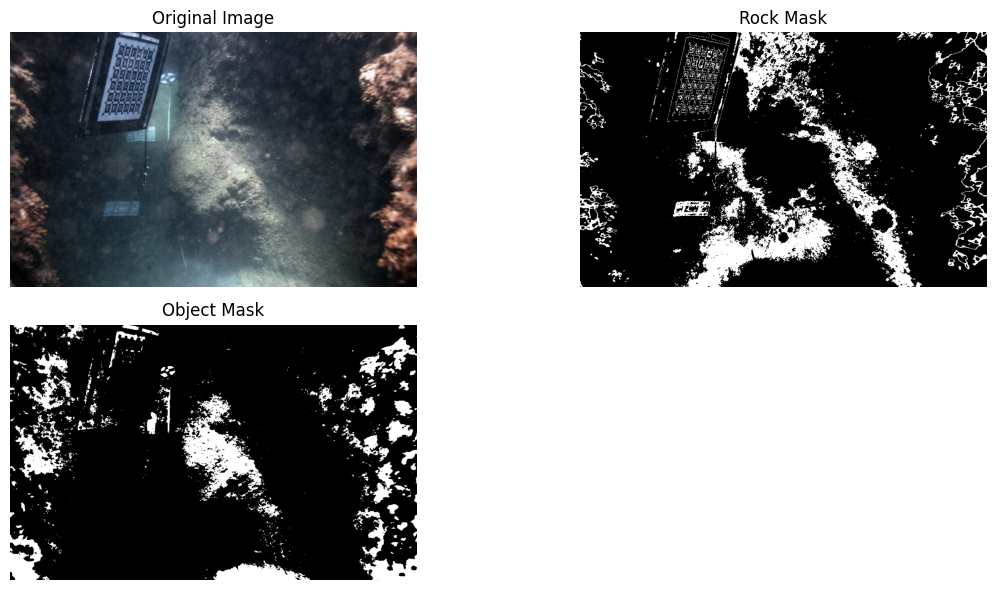

In [ ]:
# Convert the image to LAB color space
lab_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2LAB)

# Extract the L channel (lightness component) for texture analysis
L_channel = lab_image[:,:,0]

# Perform color-based segmentation
rock_mask = np.logical_and(L_channel > 70, L_channel < 100)
object_mask = np.logical_or(L_channel < 20, L_channel > 160)

# Visualize the segmentation and texture analysis results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Rock Mask
plt.subplot(2, 2, 2)
plt.imshow(rock_mask.astype(np.uint8) * 255, cmap='gray')  # Use grayscale colormap
plt.title('Rock Mask')
plt.axis('off')

# Object Mask
plt.subplot(2, 2, 3)
plt.imshow(object_mask.astype(np.uint8) * 255, cmap='gray')  # Use grayscale colormap
plt.title('Object Mask')
plt.axis('off')


plt.tight_layout()
plt.show()

It is not feasible to differentiate the object where it's very dark since it has the same values of the canyon, and where it's whiter it has the same color of the rocks in the foreground. As a result, we can't use this method as it would mask out most of the image and the useful labels, as we can see in the ground truth

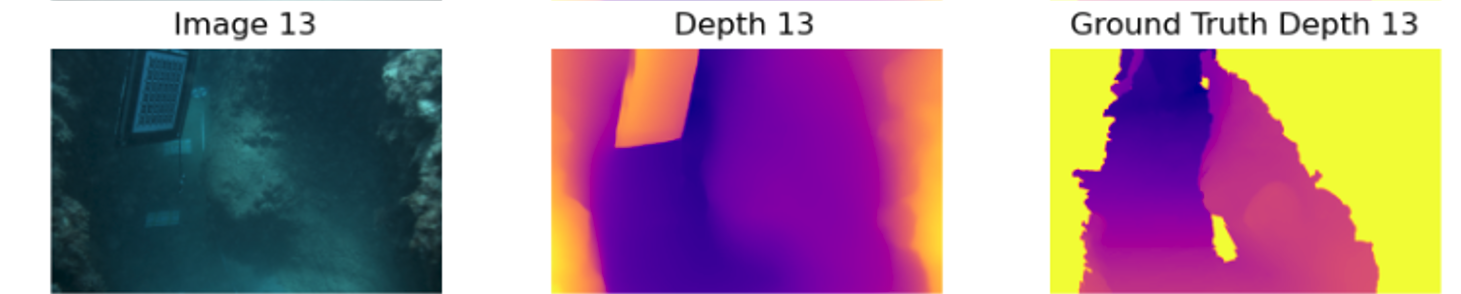

Let's have a look at texture

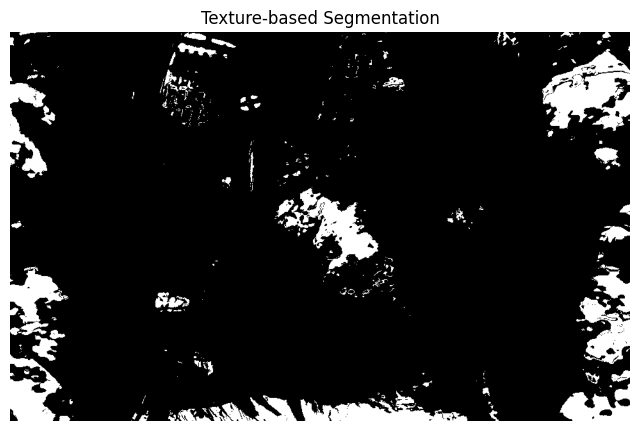

In [ ]:

# Load the image
image = cv2.imread('underwater_image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

blurred_gray = cv2.GaussianBlur(gray, (7, 7), 0)  # Adjust the kernel size as needed


# Perform texture analysis using Local Binary Patterns (LBP)
radius = 150
n_points = 5 * radius
lbp_image = local_binary_pattern(blurred_gray, n_points, radius, method='uniform')

# Threshold the LBP image to segment objects
object_mask = lbp_image < 300

# Visualize the segmentation results
plt.figure(figsize=(8, 8))
plt.imshow(object_mask, cmap='gray')
plt.title('Texture-based Segmentation')
plt.axis('off')
plt.show()

This is the best mask I could obtain. I don't think that the ratio of `things we want to mask out/things we don't want to mask out but are detected` is sufficient to justify the usage

## Try with edge detection

(-0.5, 967.5, 607.5, -0.5)

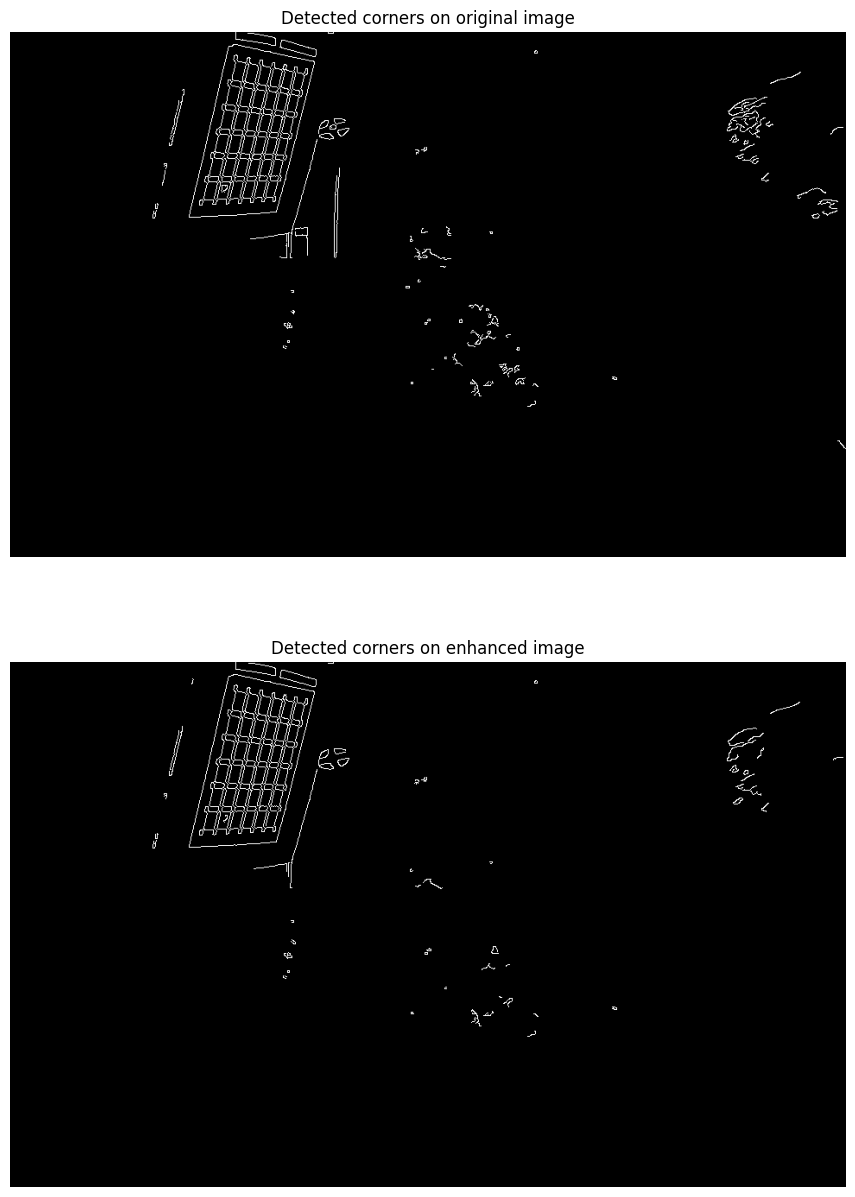

In [11]:

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges_original = cv2.Canny(gray, threshold1=50, threshold2=110)

# Convert the image to grayscale
gray = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges_enhanced = cv2.Canny(gray, threshold1=200, threshold2=400)


# Visualize the results
fig, axes = plt.subplots(2,1,figsize=(15,15))

axes[0].imshow(cv2.cvtColor(edges_original, cv2.COLOR_BGR2RGB))
axes[0].set_title('Detected corners on original image')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(edges_enhanced, cv2.COLOR_BGR2RGB))
axes[1].set_title('Detected corners on enhanced image')
axes[1].axis('off')

The edges in enhanced and normal images are basically detected the same. But we can use this to create a mask on edges!

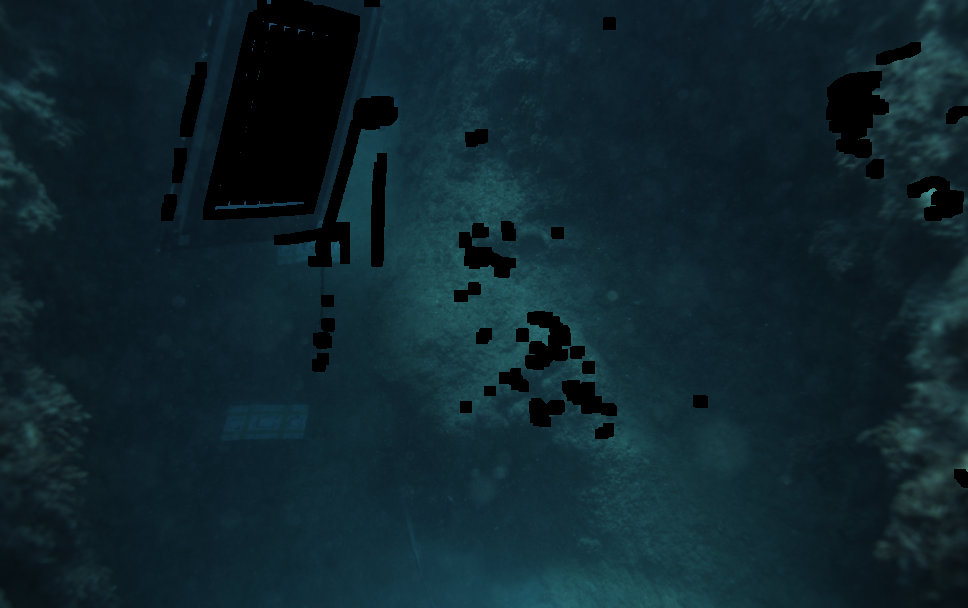

In [14]:
def mask_edges(image, threshold1=50, threshold2=110, dilation_kernel_size=3):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, threshold1=threshold1, threshold2=threshold2)

    # Create a dilation kernel
    kernel = np.ones((dilation_kernel_size, dilation_kernel_size), np.uint8)

    # Dilate the edges to create a thicker boundary
    dilated_edges = cv2.dilate(edges, kernel)

    # Invert the dilated edges mask
    dilated_edges = cv2.bitwise_not(dilated_edges)

    # Create a black background image
    background = np.zeros_like(image)

    # Copy the original image where the edges are not detected
    masked_image = cv2.bitwise_and(image, image, mask=dilated_edges)

    return masked_image


# Apply edge mask to the original image
masked_image = mask_edges(original_image, threshold1=50, threshold2=110, dilation_kernel_size=10)

# Visualize the result
cv2_imshow(masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()